In [1]:
# TidyTuesday Week 7

# Loading packages
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(scales)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor



In [2]:
# Reading in data
data <- read_csv(url("https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv"))

Warning message:
“Missing column names filled in: 'X5' [5], 'X6' [6], 'X7' [7], 'X8' [8], 'X9' [9], 'X11' [11], 'X12' [12], 'X13' [13], 'X14' [14], 'X15' [15], 'X17' [17], 'X18' [18], 'X19' [19], 'X20' [20], 'X21' [21], 'X22' [22], 'X23' [23], 'X24' [24], 'X25' [25], 'X26' [26], 'X27' [27], 'X28' [28], 'X29' [29]”Parsed with column specification:
cols(
  .default = col_character(),
  RespondentID = col_double()
)
See spec(...) for full column specifications.


In [3]:
# Preparing data

# Removing subtitle row
data <- data[-1, ]

# Renaming variables
names(data)[1] <- "id"
names(data)[2] <- "seen_movie"
names(data)[3] <- "fan"
names(data)[22] <- "vader"
names(data)[34] <- "gender"
names(data)[35] <- "age"
names(data)[36] <- "hhincome"
names(data)[37] <- "educ"
names(data)[38] <- "loc"

# Selecting columns
mydata <- subset(data, select=c("id", "seen_movie", "fan", "vader", "gender", "age",
   "hhincome", "educ", "loc"))

In [4]:
# Checking and removing NAs (today is not the day for multiple imputation:)
table(mydata$seen_movie, useNA = "always")
table(mydata$fan, useNA = "always")
table(mydata$vader, useNA = "always")
table(mydata$gender, useNA = "always")
table(mydata$age, useNA = "always")
table(mydata$hhincome, useNA = "always")
table(mydata$educ, useNA = "always")
table(mydata$loc, useNA = "always")

mydata$vader <- na_if(mydata$vader, "Unfamiliar (N/A)")

# How many complete cases?
mydata$countna <- as.vector(rowSums(is.na(mydata[, c("fan", "vader", "gender", "age", "hhincome", "educ", "loc")])))

colSums(is.na(mydata[, c("fan", "vader", "gender", "age", "hhincome", "educ", "loc")]))

table(mydata$countna)
table(mydata$countna, data$fan, useNA = "always")
table(mydata$countna, data$vader, useNA = "always")
table(mydata$countna, data$gender, useNA = "always")
table(mydata$countna, data$age, useNA = "always")
table(mydata$countna, data$hhincome, useNA = "always")
table(mydata$countna, data$educ, useNA = "always")
table(mydata$countna, data$loc, useNA = "always")


  No  Yes <NA> 
 250  936    0 


  No  Yes <NA> 
 284  552  350 


Neither favorably nor unfavorably (neutral) 
                                         84 
                         Somewhat favorably 
                                        171 
                       Somewhat unfavorably 
                                        102 
                           Unfamiliar (N/A) 
                                         10 
                             Very favorably 
                                        310 
                           Very unfavorably 
                                        149 
                                       <NA> 
                                        360 


Female   Male   <NA> 
   549    497    140 


 > 60 18-29 30-44 45-60  <NA> 
  269   218   268   291   140 


       $0 - $24,999 $100,000 - $149,999           $150,000+   $25,000 - $49,999 
                138                 141                  95                 186 
  $50,000 - $99,999                <NA> 
                298                 328 


                 Bachelor degree                  Graduate degree 
                             321                              275 
              High school degree     Less than high school degree 
                             105                                7 
Some college or Associate degree                             <NA> 
                             328                              150 


East North Central East South Central    Middle Atlantic           Mountain 
               181                 38                122                 79 
       New England            Pacific     South Atlantic West North Central 
                75                175                170                 93 
West South Central               <NA> 
               110                143 

fan    vader   gender      age hhincome     educ      loc 
     350      370      140      140      328      150      143


  0   1   2   3   4   5   6   7 
656 158 187  41   3  16   1 124 

      
        No Yes <NA>
  0    229 427    0
  1     45 113    0
  2      5   1  181
  3      0   0   41
  4      0   0    3
  5      5  10    1
  6      0   1    0
  7      0   0  124
  <NA>   0   0    0

      
       Neither favorably nor unfavorably (neutral) Somewhat favorably
  0                                             68                142
  1                                             13                 27
  2                                              0                  0
  3                                              0                  0
  4                                              0                  0
  5                                              3                  2
  6                                              0                  0
  7                                              0                  0
  <NA>                                           0                  0
      
       Somewhat unfavorably Unfamiliar (N/A) Very favorably Very unfavorably
  0                      79                0            251              116
  1                      18                8             53               31
  2                       1                1           

      
       Female Male <NA>
  0       317  339    0
  1        77   81    0
  2       123   64    0
  3        30   11    0
  4         2    1    0
  5         0    1   15
  6         0    0    1
  7         0    0  124
  <NA>      0    0    0

      
       > 60 18-29 30-44 45-60 <NA>
  0     152   138   179   187    0
  1      41    38    28    51    0
  2      62    30    54    41    0
  3      13    12     5    11    0
  4       1     0     2     0    0
  5       0     0     0     1   15
  6       0     0     0     0    1
  7       0     0     0     0  124
  <NA>    0     0     0     0    0

      
       $0 - $24,999 $100,000 - $149,999 $150,000+ $25,000 - $49,999
  0              92                 113        75               146
  1               6                   2         2                 1
  2              40                  26        18                38
  3               0                   0         0                 1
  4               0                   0         0                 0
  5               0                   0         0                 0
  6               0                   0         0                 0
  7               0                   0         0                 0
  <NA>            0                   0         0                 0
      
       $50,000 - $99,999 <NA>
  0                  230    0
  1                    8  139
  2                   59    6
  3                    1   39
  4                    0    3
  5                    0   16
  6                    0    1
  7                    0  124
  <NA>                 0    0

      
       Bachelor degree Graduate degree High school degree
  0                218             178                 51
  1                 44              47                 20
  2                 51              38                 29
  3                  8              12                  5
  4                  0               0                  0
  5                  0               0                  0
  6                  0               0                  0
  7                  0               0                  0
  <NA>               0               0                  0
      
       Less than high school degree Some college or Associate degree <NA>
  0                               1                              208    0
  1                               2                               44    1
  2                               3                               63    3
  3                               1                               13    2
  4                               0 

      
       East North Central East South Central Middle Atlantic Mountain
  0                   106                 26              72       56
  1                    27                  6              20       12
  2                    39                  5              23        8
  3                     8                  1               7        3
  4                     1                  0               0        0
  5                     0                  0               0        0
  6                     0                  0               0        0
  7                     0                  0               0        0
  <NA>                  0                  0               0        0
      
       New England Pacific South Atlantic West North Central West South Central
  0             49     112            107                 66                 62
  1             10      33             26                 10                 12
  2             12      28             28     

In [5]:
# Converting characters to factors
sapply(mydata, class)
convert <- c("seen_movie", "fan", "vader", "gender", "age", "hhincome", "educ", "loc")
mydata[, convert] = lapply(mydata[, convert], as.factor)
sapply(mydata, class)
sapply(mydata, levels)

# Reordering vactor levels
mydata$age <- factor(mydata$age, levels = c("18-29", "30-44", "45-60", "> 60"))
mydata$hhincome <- factor(mydata$hhincome, levels = c("$0 - $24,999", "$25,000 - $49,999", 
  "$50,000 - $99,999",  "$100,000 - $149,999"))
mydata$educ <- factor(mydata$educ, levels = c("Less than high school degree", "High school degree",
   "Some college or Associate degree", "Bachelor degree", "Graduate degree"))
mydata$loc <- factor(mydata$educ, levels = c("New England", "Middle Atlantic", 
   "East North Central", "West North Central", "South Atlantic", "East South Central", 
   "West South Central", "Mountain", "Pacific"))
mydata$vader <- factor(mydata$vader, levels = c("Very unfavorably", 
  "Somewhat unfavorably", "Neither favorably nor unfavorably (neutral)", "Somewhat favorably",
  "Very favorably"))

# Converting to ordered factors
mydata$age <- ordered(mydata$age)
mydata$hhincome <- ordered(mydata$hhincome)
mydata$educ <- ordered(mydata$educ)
mydata$vader <- ordered(mydata$vader)

# Recoding variables
mydata$vaderfan <- mydata$vader
levels(mydata$vaderfan) <- list(Dislike = c("Somewhat unfavorably", "Very unfavorably"), 
                           Neutral = "Neither favorably nor unfavorably (neutral)",
                           Like = c("Somewhat favorably", "Very favorably"))
table(mydata$vader, mydata$vaderfan)

# Sanity check
sapply(mydata, levels)
sapply(mydata, class)

id  seen_movie         fan       vader      gender         age 
  "numeric" "character" "character" "character" "character" "character" 
   hhincome        educ         loc     countna 
"character" "character" "character"   "numeric"

id seen_movie        fan      vader     gender        age   hhincome 
 "numeric"   "factor"   "factor"   "factor"   "factor"   "factor"   "factor" 
      educ        loc    countna 
  "factor"   "factor"  "numeric"

$id
NULL

$seen_movie
[1] "No"  "Yes"

$fan
[1] "No"  "Yes"

$vader
[1] "Neither favorably nor unfavorably (neutral)"
[2] "Somewhat favorably"                         
[3] "Somewhat unfavorably"                       
[4] "Very favorably"                             
[5] "Very unfavorably"                           

$gender
[1] "Female" "Male"  

$age
[1] "> 60"  "18-29" "30-44" "45-60"

$hhincome
[1] "$0 - $24,999"        "$100,000 - $149,999" "$150,000+"          
[4] "$25,000 - $49,999"   "$50,000 - $99,999"  

$educ
[1] "Bachelor degree"                  "Graduate degree"                 
[3] "High school degree"               "Less than high school degree"    
[5] "Some college or Associate degree"

$loc
[1] "East North Central" "East South Central" "Middle Atlantic"   
[4] "Mountain"           "New England"        "Pacific"           
[7] "South Atlantic"     "West North Central" "West South Central"

$countna
NULL

                                             
                                              Dislike Neutral Like
  Very unfavorably                                149       0    0
  Somewhat unfavorably                            102       0    0
  Neither favorably nor unfavorably (neutral)       0      84    0
  Somewhat favorably                                0       0  171
  Very favorably                                    0       0  310

$id
NULL

$seen_movie
[1] "No"  "Yes"

$fan
[1] "No"  "Yes"

$vader
[1] "Very unfavorably"                           
[2] "Somewhat unfavorably"                       
[3] "Neither favorably nor unfavorably (neutral)"
[4] "Somewhat favorably"                         
[5] "Very favorably"                             

$gender
[1] "Female" "Male"  

$age
[1] "18-29" "30-44" "45-60" "> 60" 

$hhincome
[1] "$0 - $24,999"        "$25,000 - $49,999"   "$50,000 - $99,999"  
[4] "$100,000 - $149,999"

$educ
[1] "Less than high school degree"     "High school degree"              
[3] "Some college or Associate degree" "Bachelor degree"                 
[5] "Graduate degree"                 

$loc
[1] "New England"        "Middle Atlantic"    "East North Central"
[4] "West North Central" "South Atlantic"     "East South Central"
[7] "West South Central" "Mountain"           "Pacific"           

$countna
NULL

$vaderfan
[1] "Dislike" "Neutral" "Like"

$id
[1] "numeric"

$seen_movie
[1] "factor"

$fan
[1] "factor"

$vader
[1] "ordered" "factor" 

$gender
[1] "factor"

$age
[1] "ordered" "factor" 

$hhincome
[1] "ordered" "factor" 

$educ
[1] "ordered" "factor" 

$loc
[1] "factor"

$countna
[1] "numeric"

$vaderfan
[1] "ordered" "factor"

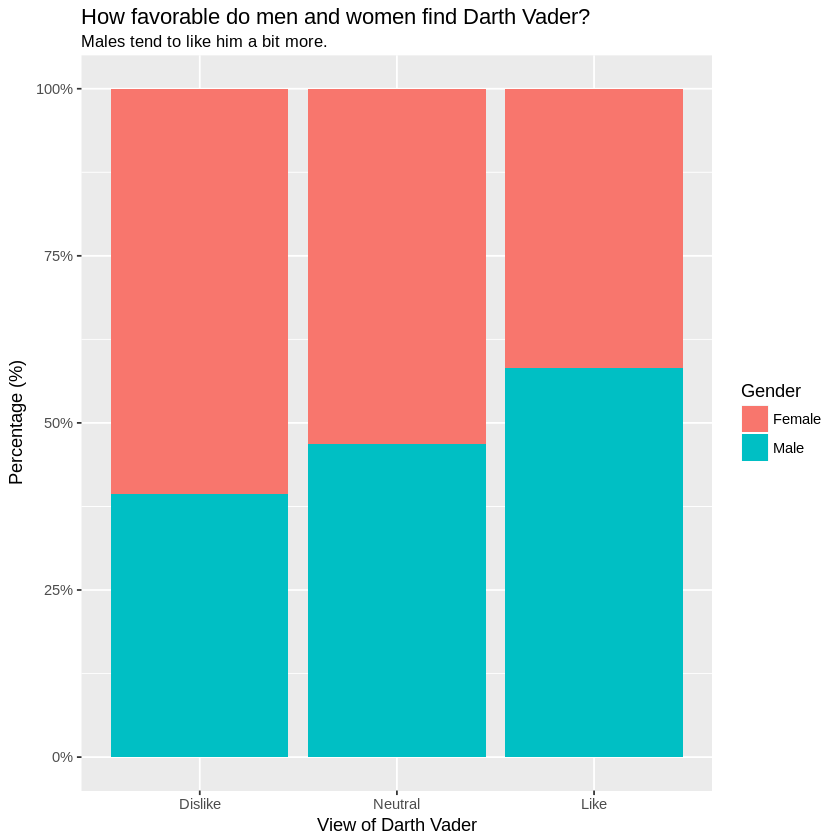

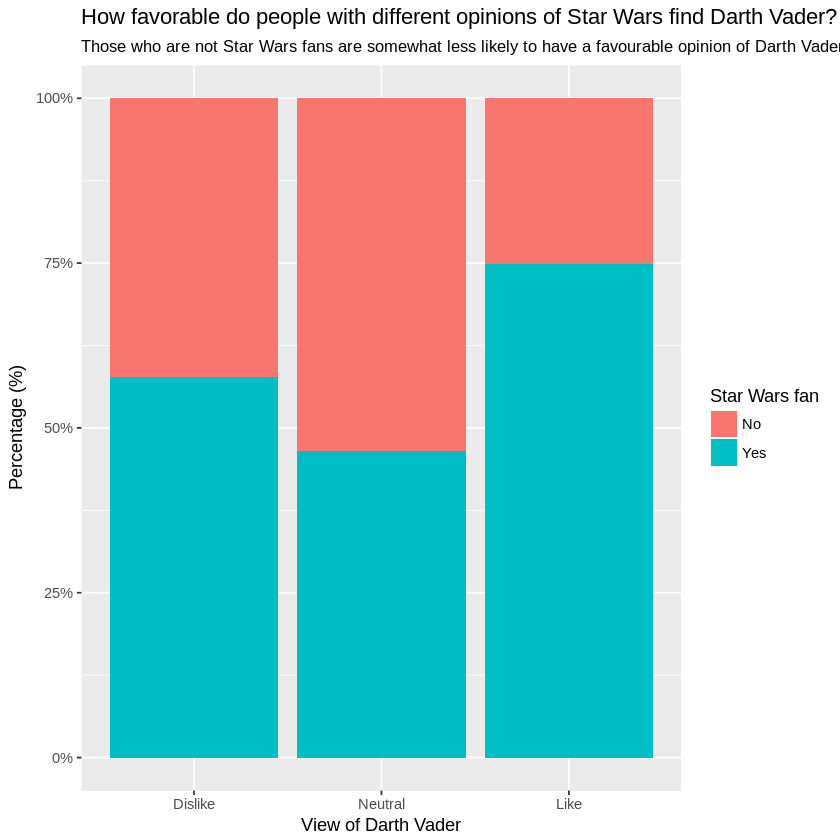

In [7]:
# Darth Vader's fan base

# View of Darth Vader by gender
plot_gender <- ggplot(na.omit(subset(mydata, select = c(vaderfan, gender))), aes(x = vaderfan, fill = gender)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent_format())  + 
  labs(title = "How favorable do men and women find Darth Vader?", 
       subtitle = "Males tend to like him a bit more.", x = "View of Darth Vader", 
       y = "Percentage (%)", fill = "Gender")
plot_gender

# Fan
plot_fan <- ggplot(na.omit(subset(mydata, select = c(vaderfan, fan))), aes(x = vaderfan, fill = fan)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent_format())  + 
  labs(title = "How favorable do people with different opinions of Star Wars find Darth Vader?", 
       subtitle = "Those who are not Star Wars fans are somewhat less likely to have a favourable opinion of Darth Vader.", x = "View of Darth Vader", 
       y = "Percentage (%)", fill = "Star Wars fan")
plot_fan